# Create Scatter Plots Showing Diversity in Heat Wave and Cold Snap Parameters


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta


## Set the Directory Structure

In [227]:
# Identify the top-level directory and the subdirectory where the data will be stored:
hw_cs_data_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/'
nerc_shapefile_data_dir = '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/nerc_shapefiles'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/plots/'


## Process the Heat Wave and Cold Snap Library


In [85]:
# Define a function to extract the heat wave or cold snap data for a given NERC region and definition:
def process_hw_cs_data(hw_cs_data_dir: str, hw_cs: str, region: int, definition: int):
    
    if hw_cs == 'HW':
       # Read in the raw data from the heat wave library:
       df = pd.read_csv((hw_cs_data_dir + 'hw_library.csv'))
    elif hw_cs == 'CS':
       # Read in the raw data from the cold snap library:
       df = pd.read_csv((hw_cs_data_dir + 'cs_library.csv'))

    # Bin the spatial coverage values:
    df['spatial_coverage_bin'] = 0
    df.loc[((df['spatial_coverage'] > 0) & (df['spatial_coverage'] <= 10)), 'spatial_coverage_bin'] = 10
    df.loc[((df['spatial_coverage'] > 10) & (df['spatial_coverage'] <= 20)), 'spatial_coverage_bin'] = 20
    df.loc[((df['spatial_coverage'] > 20) & (df['spatial_coverage'] <= 30)), 'spatial_coverage_bin'] = 30
    df.loc[((df['spatial_coverage'] > 30) & (df['spatial_coverage'] <= 40)), 'spatial_coverage_bin'] = 40
    df.loc[((df['spatial_coverage'] > 40) & (df['spatial_coverage'] <= 50)), 'spatial_coverage_bin'] = 50
    df.loc[((df['spatial_coverage'] > 50) & (df['spatial_coverage'] <= 60)), 'spatial_coverage_bin'] = 60
    df.loc[((df['spatial_coverage'] > 60) & (df['spatial_coverage'] <= 70)), 'spatial_coverage_bin'] = 70
    df.loc[((df['spatial_coverage'] > 70) & (df['spatial_coverage'] <= 80)), 'spatial_coverage_bin'] = 80
    df.loc[((df['spatial_coverage'] > 80) & (df['spatial_coverage'] <= 90)), 'spatial_coverage_bin'] = 90
    df.loc[((df['spatial_coverage'] > 90) & (df['spatial_coverage'] <= 100)), 'spatial_coverage_bin'] = 100
    
    # Subset to just the data for NERC region and definition you want to use:
    subset_df = df[(df['NERC_ID'] == ('NERC' + str(region))) & (df['definition'] == ('def' + str(definition)))].copy()

    # Set 'centroid_date' to a datetime variable and extract the day of year:
    subset_df['centroid_date'] = pd.to_datetime(subset_df['centroid_date'])
    subset_df['centroid_doy'] = subset_df['centroid_date'].dt.day_of_year

    return subset_df


In [113]:
# Test the function:
output_df = process_hw_cs_data(hw_cs_data_dir = hw_cs_data_dir, 
                               hw_cs = 'HW',
                               region = 8,
                               definition = 6)

output_df


,event_id,NERC_ID,definition,rank,start_date,end_date,centroid_date,highest_temperature,duration,spatial_coverage,spatial_coverage_bin,centroid_doy
12704,NERC8_def6_HWR1,NERC8,def6,1,2023-08-17,2023-09-09,2023-08-19,111.3,24,41.2,50,231
12705,NERC8_def6_HWR2,NERC8,def6,2,2011-06-12,2011-09-03,2011-08-02,111.0,84,33.1,40,214
12706,NERC8_def6_HWR3,NERC8,def6,3,2018-07-19,2018-07-28,2018-07-20,108.7,10,52.2,60,201
12707,NERC8_def6_HWR4,NERC8,def6,4,2012-06-22,2012-08-16,2012-07-19,108.3,56,19.4,20,201
12708,NERC8_def6_HWR5,NERC8,def6,5,2006-07-11,2006-08-26,2006-07-19,108.1,47,17.5,20,200
12709,NERC8_def6_HWR6,NERC8,def6,6,2000-07-31,2000-09-14,2000-09-02,106.5,46,15.9,20,246
12710,NERC8_def6_HWR7,NERC8,def6,7,2023-07-10,2023-08-14,2023-07-27,106.0,36,26.9,30,208
12711,NERC8_def6_HWR8,NERC8,def6,8,1980-06-24,1980-08-21,1980-07-30,105.6,59,19.4,20,212
12712,NERC8_def6_HWR9,NERC8,def6,9,1984-08-26,1984-09-01,1984-08-29,105.2,7,50.3,60,242
12713,NERC8_def6_HWR10,NERC8,def6,10,2022-07-19,2022-07-28,2022-07-19,104.6,10,47.2,50,200


## Make the Plot


In [241]:
def plot_hw_cs_data(hw_cs_data_dir: str, hw_cs: str, region: int, definition: int, image_output_dir: str, image_resolution: int, save_images=False):

    # Read in NERC region name file and extract the name:
    nerc = pd.read_csv((hw_cs_data_dir + 'nerc_region_names.csv'))
    nerc_name = nerc.loc[nerc['number'] == region, 'short_name'].item()
    
    # Process the data using the function defined above:
    output_df = process_hw_cs_data(hw_cs_data_dir = hw_cs_data_dir, 
                                   hw_cs = hw_cs,
                                   region = region,
                                   definition = definition)

    # For cold snaps, shift the centroid date to plot whole winter seasons together:
    if hw_cs == 'CS':
       output_df.loc[(output_df['centroid_doy'] > 182), 'centroid_doy'] = output_df['centroid_doy']-365

    # Set the plot parameters based on plotting heat waves or cold snaps:
    if hw_cs == 'HW':
       cmap = plt.get_cmap('Reds', 28)
       variable = 'highest_temperature'
       xticks = [121, 152, 182, 213, 244, 274]
       xticklabels = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
       xmin = 121
       xmax = 274 
       ylabel = 'Maximum Temperature [$^\circ$F]'
       title = ('Heat Wave Events in ' + nerc_name + '\n Definition ' + str(definition) + ', 1980-2024, N=' + str(len(output_df)))
    elif hw_cs == 'CS':
       cmap = plt.get_cmap('Blues', 28)
       variable = 'lowest_temperature'
       xticks = [-61, -31, 1, 32, 60, 91]
       xticklabels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
       xmin = -61
       xmax = 91   
       ylabel = 'Minimum Temperature [$^\circ$F]'
       title = ('Cold Snap Events in ' + nerc_name + '\n Definition ' + str(definition) + ', 1980-2024, N=' + str(len(output_df)))
        
    # Make the plot:
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.axisbelow'] = True
    sc = plt.scatter(output_df['centroid_doy'], output_df[variable], s=(output_df['spatial_coverage_bin']*1.5), c=output_df['duration'], 
                     edgecolors='k', cmap=cmap, vmin=0, vmax=28, label='Size $\\propto$ Area Impacted')
    cbar = plt.colorbar(sc, ticks=[0, 7, 14, 21, 28])
    cbar.ax.set_ylabel('Event Duration [Days]')
    plt.legend(loc='best', prop={'size': 18})
    plt.grid()
    plt.xticks(xticks, xticklabels)
    plt.xlim([xmin, xmax])
    plt.ylim([(output_df[variable].min()-1), (output_df[variable].max()+1)])
    plt.xlabel('Day of the Year')
    plt.ylabel(ylabel)
    plt.title(title)

    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir + 'NERC' + str(region) + '_Def' + str(definition) + '_' + hw_cs + '_1980_2024.png'), dpi=image_resolution, bbox_inches='tight')
       # plt.close()


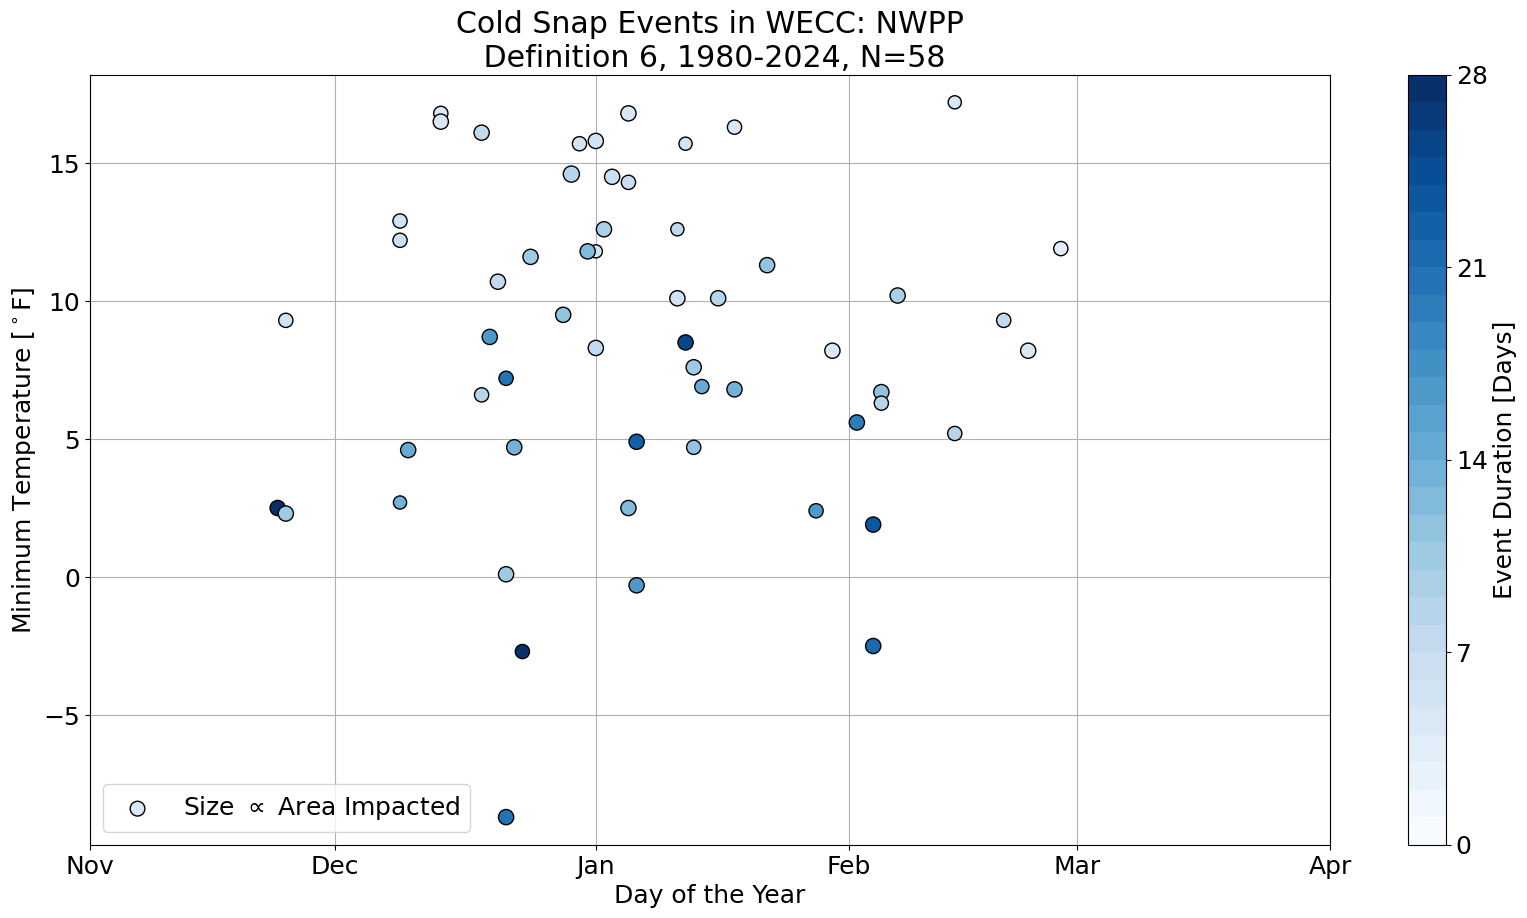

In [243]:
# Make the plot
plot_hw_cs_data(hw_cs_data_dir = hw_cs_data_dir, 
                hw_cs = 'CS',
                region = 6,
                definition = 6,
                image_output_dir = image_output_dir, 
                image_resolution = 150, 
                save_images = True)
